Setup

In [28]:
import pandas as pd
import os
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

Path

In [29]:
path_to_local_files = "C:/Users/Harry/Documents/GitHub/MasterThesis/Programming/analysis/local_log_files"

Format timestamps

In [30]:
def format_timestamp(date, time):
    dt_str = f"{date} {time}"
    dt_obj = datetime.strptime(dt_str, "%Y%m%d %H%M%S")
    return dt_obj

<h3> 2. Load and structure local files

In [31]:
def load_csv_files(path_to_files):
    all_data = pd.DataFrame()
    
    for file in os.listdir(path_to_files):
    
        if file.endswith(".csv"):
            file_path = os.path.join(path_to_files, file)
            df_logfiles = pd.read_csv(file_path)
            df_logfiles['filename'] = file
            all_data = pd.concat([all_data, df_logfiles])
    
    return all_data

df_logfiles = load_csv_files(path_to_local_files)
df_logfiles.columns = ['user_id', 'timestamp', 'key', 'mapped_to', 'event', 'filename']
df_logfiles['timestamp'] = pd.to_datetime(df_logfiles['timestamp'])

display(df_logfiles.columns)

display(df_logfiles.head(12))

Index(['user_id', 'timestamp', 'key', 'mapped_to', 'event', 'filename'], dtype='object')

,user_id,timestamp,key,mapped_to,event,filename
0,1,2024-09-30 08:58:41,user_id,001,mapping,001_20240930_085737_key_events.csv
1,1,2024-09-30 08:58:41,input_1,Alt+Tab,mapping,001_20240930_085737_key_events.csv
2,1,2024-09-30 08:58:41,input_2,NaN,mapping,001_20240930_085737_key_events.csv
3,1,2024-09-30 08:58:41,input_3,NaN,mapping,001_20240930_085737_key_events.csv
4,1,2024-09-30 08:58:43,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
5,1,2024-09-30 08:58:43,Key.f22,Alt+Tab,up,001_20240930_085737_key_events.csv
6,1,2024-09-30 08:58:45,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
7,1,2024-09-30 08:58:45,Key.f22,Alt+Tab,up,001_20240930_085737_key_events.csv
8,1,2024-09-30 08:58:50,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
9,1,2024-09-30 08:58:50,Key.f22,Alt+Tab,up,001_20240930_085737_key_events.csv


2.1. Create Clean Dataframes

In [36]:
df_key_interactions = df_logfiles[df_logfiles['key'].str.startswith('Key.')]
df_keyf22_interactions = df_logfiles[df_logfiles['key'].str.startswith('Key.f22')]
df_keyf23_interactions = df_logfiles[df_logfiles['key'].str.startswith('Key.f23')]
df_keyf24_interactions = df_logfiles[df_logfiles['key'].str.startswith('Key.f24')]

df_extra_logs = df_logfiles[df_logfiles['event'].str.startswith('mapping')]
df_mappings  = df_extra_logs[df_extra_logs['key'].str.startswith('input')]

df_key_counts = df_logfiles[df_logfiles['key'].str.startswith('key_count')]

df_exited_timestamp = df_logfiles[df_logfiles['event'].str.startswith('00')]

df_exceptions = df_logfiles[df_logfiles['key'].str.startswith('exception')]
df_success = df_logfiles[df_logfiles['key'].str.startswith('success')]

#df_key_interactions.to_csv('dataframes\df_key_interactions.csv', index=False)
#df_keyf22_interactions.to_csv('dataframes\df_keyf22_interactions.csv', index=False)
#df_keyf23_interactions.to_csv('dataframes\df_keyf23_interactions.csv', index=False)
#df_keyf24_interactions.to_csv('dataframes\df_keyf24_interactions.csv', index=False)
#df_extra_logs.to_csv('dataframes\df_extra_logs.csv', index=False)
#df_mappings.to_csv('dataframes\df_mappings.csv', index=False)
#df_key_counts.to_csv('dataframes\df_key_counts.csv', index=False)
#df_exited_timestamp.to_csv('dataframes\df_exited_timestamp.csv', index=False)
#df_exceptions.to_csv('dataframes\df_exceptions.csv', index=False)
#df_success.to_csv('dataframes\df_success.csv', index=False)

display("key_interactions", df_key_interactions)
#display("keyF22", df_keyf22_interactions.count())
#display("keyF23", df_keyf23_interactions.count())
#display("keyF24", df_keyf24_interactions.count())
#display("extraLogs", df_extra_logs.count())
#display("mappings", df_mappings.count())
#display("keyCount", df_key_counts.count())
#display("exitedTimestamp", df_exited_timestamp.count)
#display("exceptions", df_exceptions.count())
#display("success", df_success.count())


'key_interactions'

,user_id,timestamp,key,mapped_to,event,filename
4,1,2024-09-30 08:58:43,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
5,1,2024-09-30 08:58:43,Key.f22,Alt+Tab,up,001_20240930_085737_key_events.csv
6,1,2024-09-30 08:58:45,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
7,1,2024-09-30 08:58:45,Key.f22,Alt+Tab,up,001_20240930_085737_key_events.csv
8,1,2024-09-30 08:58:50,Key.f22,Alt+Tab,down,001_20240930_085737_key_events.csv
...,...,...,...,...,...,...
147,12,2024-10-25 15:56:46,Key.f23,nexttrack,up,012_20241025_090117_key_events.csv
148,12,2024-10-25 15:56:49,Key.f23,nexttrack,down,012_20241025_090117_key_events.csv
149,12,2024-10-25 15:56:49,Key.f23,nexttrack,up,012_20241025_090117_key_events.csv
150,12,2024-10-25 15:59:40,Key.f23,nexttrack,down,012_20241025_090117_key_events.csv


auswertung für basic stats

In [40]:
def analyse_basic_stats(groupings):
    pedal_count = df_key_interactions.groupby(groupings).size().rename("total_interactions")
    
    event_counts = df_key_interactions.groupby(groupings)['event'].value_counts().unstack(fill_value=0)

    f22_count = df_keyf22_interactions.groupby(groupings).size().rename("f22_count")
    f23_count = df_keyf23_interactions.groupby(groupings).size().rename("f23_count")
    f24_count = df_keyf24_interactions.groupby(groupings).size().rename("f24_count")

    mapped_to_counts = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("most_mapped_to")
    f22_mapped_to = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f22_most_mapped_to")
    f23_mapped_to = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f23_most_mapped_to")
    f24_mapped_to = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f24_most_mapped_to")

    mappings_count = df_extra_logs.groupby(groupings).size().rename("total_mappings") / 4

    df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])
    key_counts_all = df_key_counts.groupby('user_id')['event'].sum().rename("key_counts_all")
    
    key_counts = (key_counts_all - pedal_count).rename("only_key_counts")
    
    pedal_counts_percentage = ((pedal_count/ key_counts_all)*100).rename("pedal_percentage")


    combined_output = pd.concat([pedal_count, event_counts, f22_count, f23_count, f24_count,
                                  mapped_to_counts, f22_mapped_to, f23_mapped_to, f24_mapped_to, mappings_count, key_counts_all, key_counts, pedal_counts_percentage]
                                  , axis=1)
    combined_output.loc['Summe'] = combined_output.sum(numeric_only=True)
    return combined_output
 

In [61]:
def analyse_basic_stats_plus(groupings):
    pedal_count = df_key_interactions.groupby(groupings).size().rename("total_interactions")
    
    event_counts = df_key_interactions.groupby(groupings)['event'].value_counts().unstack(fill_value=0)

    f22_count = df_keyf22_interactions.groupby(groupings).size().rename("f22_count")
    f23_count = df_keyf23_interactions.groupby(groupings).size().rename("f23_count")
    f24_count = df_keyf24_interactions.groupby(groupings).size().rename("f24_count")

    # Prozentanteile berechnen
    f22_count_percentage = ((f22_count / pedal_count) * 100).rename("f22_percentage")
    f23_count_percentage = ((f23_count / pedal_count) * 100).rename("f23_percentage")
    f24_count_percentage = ((f24_count / pedal_count) * 100).rename("f24_percentage")

    mapped_to_counts = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("most_mapped_to")
    f22_mapped_to = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f22_most_mapped_to")
    f23_mapped_to = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f23_most_mapped_to")
    f24_mapped_to = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f24_most_mapped_to")

    #unique_mappings_count = df_key_interactions.groupby(groupings)['mapped_to'].nunique().rename("unique_mappings_count")
    mappings_count = df_extra_logs.groupby(groupings).size().rename("total_mappings") / 4

    df_key_counts.loc[:, 'event'] = pd.to_numeric(df_key_counts['event'])
    key_counts_all = df_key_counts.groupby('user_id')['event'].sum().rename("key_counts_all")
    
    key_counts = (key_counts_all - pedal_count).rename("only_key_counts")
    
    pedal_counts_percentage = ((pedal_count / key_counts_all) * 100).rename("pedal_percentage")

    combined_output = pd.concat([
        pedal_count, event_counts, f22_count, f23_count, f24_count,
        f22_count_percentage, f23_count_percentage, f24_count_percentage,
        mapped_to_counts, f22_mapped_to, f23_mapped_to, f24_mapped_to, #unique_mappings_count,
        mappings_count, key_counts_all, key_counts, pedal_counts_percentage
    ], axis=1)
    
    return combined_output

entries_per_user = analyse_basic_stats_plus('user_id')
display(entries_per_user)


,total_interactions,down,up,f22_count,f23_count,f24_count,f22_percentage,f23_percentage,f24_percentage,most_mapped_to,f22_most_mapped_to,f23_most_mapped_to,f24_most_mapped_to,total_mappings,key_counts_all,only_key_counts,pedal_percentage
user_id,,,,,,,,,,,,,,,,,
1,1668,1066,602,935,104,629,56.055156,6.235012,37.709832,Alt,Alt,Ctrl+t,Tab,6.0,53933,52265,3.092726
2,2396,2138,258,201,1008,1187,8.388982,42.070117,49.540902,Ctrl,Alt+Tab,Alt,Ctrl,26.0,69734,67338,3.435914
3,1175,944,231,131,132,912,11.148936,11.234043,77.617021,Alt,mouse_middle,Ctrl+Tab,Alt,22.0,16728,15553,7.024151
4,400,220,180,152,172,76,38.000000,43.000000,19.000000,Ctrl+f,Ctrl+f,Ctrl+k+Ctrl+c,Ctrl+k+Ctrl+u,9.0,58498,58098,0.683784
5,758,379,379,184,334,240,24.274406,44.063325,31.662269,nexttrack,playpause,nexttrack,Enter,14.0,90827,90069,0.834554
6,1479,996,483,374,683,422,25.287356,46.179851,28.532792,mouse_left,Ctrl+c,mouse_left,Right,17.0,33869,32390,4.366825
7,4067,2373,1694,2794,509,764,68.699287,12.515368,18.785345,Alt+Tab,Alt+Tab,Ctrl+Tab,fn,25.0,78910,74843,5.153973
8,4164,2433,1731,304,2215,1645,7.300672,53.194044,39.505283,Down,Ctrl+c,Down,Down,32.0,12288,8124,33.886719
9,537,271,266,62,317,158,11.545624,59.031657,29.422719,Alt+Left,win,Alt+Left,Ctrl+t,11.0,52930,52393,1.014548


2.2.1 User

2.2.1.1 Entries per User, up and down

In [45]:
entries_per_user = analyse_basic_stats('user_id')
display(entries_per_user)

C:\Users\Harry\AppData\Local\Temp\ipykernel_14020\2941729435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])


,total_interactions,down,up,f22_count,f23_count,f24_count,most_mapped_to,f22_most_mapped_to,f23_most_mapped_to,f24_most_mapped_to,total_mappings,key_counts_all,only_key_counts,pedal_percentage
user_id,,,,,,,,,,,,,,
1,1668.0,1066.0,602.0,935.0,104.0,629.0,Alt,Alt,Ctrl+t,Tab,6.0,53933.0,52265.0,3.092726
2,2396.0,2138.0,258.0,201.0,1008.0,1187.0,Ctrl,Alt+Tab,Alt,Ctrl,26.0,69734.0,67338.0,3.435914
3,1175.0,944.0,231.0,131.0,132.0,912.0,Alt,mouse_middle,Ctrl+Tab,Alt,22.0,16728.0,15553.0,7.024151
4,400.0,220.0,180.0,152.0,172.0,76.0,Ctrl+f,Ctrl+f,Ctrl+k+Ctrl+c,Ctrl+k+Ctrl+u,9.0,58498.0,58098.0,0.683784
5,758.0,379.0,379.0,184.0,334.0,240.0,nexttrack,playpause,nexttrack,Enter,14.0,90827.0,90069.0,0.834554
6,1479.0,996.0,483.0,374.0,683.0,422.0,mouse_left,Ctrl+c,mouse_left,Right,17.0,33869.0,32390.0,4.366825
7,4067.0,2373.0,1694.0,2794.0,509.0,764.0,Alt+Tab,Alt+Tab,Ctrl+Tab,fn,25.0,78910.0,74843.0,5.153973
8,4164.0,2433.0,1731.0,304.0,2215.0,1645.0,Down,Ctrl+c,Down,Down,32.0,12288.0,8124.0,33.886719
9,537.0,271.0,266.0,62.0,317.0,158.0,Alt+Left,win,Alt+Left,Ctrl+t,11.0,52930.0,52393.0,1.014548


In [11]:
def count_key_presses(df, key_columns):
    # Erstelle ein leeres Dictionary, um die Ergebnisse zu speichern
    key_press_counts = {}

    # Iteriere über jede Spalte mit den "most_mapped_to"-Tasten
    for column in key_columns:
        # Für jede Taste in der Spalte zähle, wie oft sie insgesamt in der Spalte 'event' gedrückt wurde
        for key in df[column].dropna().unique():
            if key in key_press_counts:
                key_press_counts[key] += df_key_interactions[df_key_interactions['mapped_to'] == key].shape[0]
            else:
                key_press_counts[key] = df_key_interactions[df_key_interactions['mapped_to'] == key].shape[0]

    return key_press_counts

# Beispielaufruf der Funktion
key_columns = ['most_mapped_to']
key_press_counts = count_key_presses(entries_per_user, key_columns)
display(key_press_counts)

{'Alt': 2289,
 'Ctrl': 1081,
 'Ctrl+f': 152,
 'nexttrack': 486,
 'mouse_left': 4082,
 'Alt+Tab': 3094,
 'Down': 3297,
 'Alt+Left': 294,
 'volumeup': 504,
 'Shift+backspace': 818}

In [12]:
def analyse_basic_stats(groupings):
    # Bestehende Berechnungen
    pedal_count = df_key_interactions.groupby(groupings).size().rename("total_interactions")
    event_counts = df_key_interactions.groupby(groupings)['event'].value_counts().unstack(fill_value=0)
    f22_count = df_keyf22_interactions.groupby(groupings).size().rename("f22_count")
    f23_count = df_keyf23_interactions.groupby(groupings).size().rename("f23_count")
    f24_count = df_keyf24_interactions.groupby(groupings).size().rename("f24_count")

    # Berechnung der häufigsten Tasten für die jeweiligen Kategorien
    mapped_to_counts = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("most_mapped_to")
    f22_mapped_to = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f22_most_mapped_to")
    f23_mapped_to = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f23_most_mapped_to")
    f24_mapped_to = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f24_most_mapped_to")

    # Zähle, wie oft jede der häufigsten Tasten gedrückt wurde
    mapped_to_count = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("most_mapped_to_count")
    f22_mapped_to_count = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f22_most_mapped_to_count")
    f23_mapped_to_count = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f23_most_mapped_to_count")
    f24_mapped_to_count = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f24_most_mapped_to_count")

    # Zusätzliche Berechnungen
    mappings_count = df_extra_logs.groupby(groupings).size().rename("total_mappings") / 4
    df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])
    key_counts_all = df_key_counts.groupby('user_id')['event'].sum().rename("key_counts_all")
    key_counts = (key_counts_all - pedal_count).rename("only_key_counts")
    pedal_counts_percentage = ((pedal_count / key_counts_all) * 100).rename("pedal_percentage")

    # Alle Daten in den kombinierten Output integrieren
    combined_output = pd.concat([
        pedal_count, event_counts, f22_count, f23_count, f24_count,
        mapped_to_counts, mapped_to_count,
        f22_mapped_to, f22_mapped_to_count,
        f23_mapped_to, f23_mapped_to_count,
        f24_mapped_to, f24_mapped_to_count,
        mappings_count, key_counts_all, key_counts, pedal_counts_percentage
    ], axis=1)

    # Summiere alle numerischen Spalten
    combined_output.loc['Summe'] = combined_output.sum(numeric_only=True)
    return combined_output


In [13]:
print(entries_per_user['f24_count']  )

user_id
1         629.0
2        1187.0
3         912.0
4          76.0
5         240.0
6         422.0
7         764.0
8        1645.0
9         158.0
10       1570.0
11        646.0
12       1528.0
Summe    9777.0
Name: f24_count, dtype: float64


In [46]:
entries_per_user['total_mappings']
#entries_per_user['down'].describe()

user_id
1          6.0
2         26.0
3         22.0
4          9.0
5         14.0
6         17.0
7         25.0
8         32.0
9         11.0
10        10.0
11         8.0
12        26.0
Summe    206.0
Name: total_mappings, dtype: float64

2.2.1.2 Entries per user per working day

using the same dataframe, but sorting by filename (a file a day)



hier stimmt nicht nach was gruppiert wird
und es gibt das pedal count eigenrlich nicht

In [15]:
def analyse_basic_stats_per_file(groupings):
    pedal_count = df_key_interactions.groupby(groupings).size().rename("total_interactions")
    
    event_counts = df_key_interactions.groupby(groupings)['event'].value_counts().unstack(fill_value=0)

    f22_count = df_keyf22_interactions.groupby(groupings).size().rename("f22_count")
    f23_count = df_keyf23_interactions.groupby(groupings).size().rename("f23_count")
    f24_count = df_keyf24_interactions.groupby(groupings).size().rename("f24_count")

    mapped_to_counts = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("most_mapped_to")
    f22_mapped_to = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f22_most_mapped_to")
    f23_mapped_to = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f23_most_mapped_to")
    f24_mapped_to = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f24_most_mapped_to")

    mappings_count = df_extra_logs.groupby(groupings).size().rename("total_mappings") / 4

    df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])
    key_counts_all = df_key_counts.groupby('user_id')['event'].sum().rename("key_counts_all")
    


    combined_output = pd.concat([pedal_count, event_counts, f22_count, f23_count, f24_count,
                                  mapped_to_counts, f22_mapped_to, f23_mapped_to, f24_mapped_to, mappings_count]
                                  , axis=1)
    #combined_output.loc['Summe'] = combined_output.sum(numeric_only=True)
    return combined_output

In [16]:
entries_per_file = analyse_basic_stats_per_file('filename')
display(entries_per_file)

C:\Users\Harry\AppData\Local\Temp\ipykernel_14020\675809238.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])


,total_interactions,down,up,f22_count,f23_count,f24_count,most_mapped_to,f22_most_mapped_to,f23_most_mapped_to,f24_most_mapped_to,total_mappings
filename,,,,,,,,,,,
001_20240930_085737_key_events.csv,166.0,83.0,83.0,120.0,34.0,12.0,Alt+Tab,Alt+Tab,win+Left,win+Right,4.0
001_20241001_161248_key_events.csv,547.0,460.0,87.0,437.0,12.0,98.0,Alt,Alt,Ctrl+t,Tab,2.0
001_20241002_082915_key_events.csv,676.0,372.0,304.0,276.0,40.0,360.0,Tab,Alt,Ctrl+t,Tab,NaN
001_20241003_085355_key_events.csv,174.0,96.0,78.0,64.0,8.0,102.0,Tab,Alt,Ctrl+t,Tab,NaN
001_20241004_100621_key_events.csv,105.0,55.0,50.0,38.0,10.0,57.0,Tab,Alt,Ctrl+t,Tab,NaN
002_20240930_091042_key_events.csv,1145.0,1064.0,81.0,82.0,28.0,1035.0,Ctrl,Alt,Tab,Ctrl,19.0
002_20241001_090136_key_events.csv,135.0,68.0,67.0,56.0,15.0,64.0,Ctrl+s,Alt+Tab,F8,Ctrl+s,4.0
002_20241002_090331_key_events.csv,1021.0,958.0,63.0,32.0,945.0,44.0,Alt,Alt+Tab,Alt,Ctrl+s,3.0
002_20241003_085212_key_events.csv,67.0,34.0,33.0,21.0,12.0,34.0,Ctrl+s,Alt+Tab,Ctrl+Shift+7,Ctrl+s,NaN


In [17]:
def analyse_basic_stats_more(groupings):
    # Bestehende Berechnungen
    pedal_count = df_key_interactions.groupby(groupings).size().rename("total_interactions")
    event_counts = df_key_interactions.groupby(groupings)['event'].value_counts().unstack(fill_value=0)
    f22_count = df_keyf22_interactions.groupby(groupings).size().rename("f22_count")
    f23_count = df_keyf23_interactions.groupby(groupings).size().rename("f23_count")
    f24_count = df_keyf24_interactions.groupby(groupings).size().rename("f24_count")

    # Berechnung der häufigsten Tasten für die jeweiligen Kategorien
    mapped_to_counts = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("most_mapped_to")
    f22_mapped_to = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f22_most_mapped_to")
    f23_mapped_to = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f23_most_mapped_to")
    f24_mapped_to = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().idxmax() if not x.empty else None).rename("f24_most_mapped_to")

    # Zähle, wie oft jede der häufigsten Tasten gedrückt wurde
    mapped_to_count = df_key_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("most_mapped_to_count")
    f22_mapped_to_count = df_keyf22_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f22_most_mapped_to_count")
    f23_mapped_to_count = df_keyf23_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f23_most_mapped_to_count")
    f24_mapped_to_count = df_keyf24_interactions.groupby(groupings)['mapped_to'].apply(lambda x: x.value_counts().max() if not x.empty else 0).rename("f24_most_mapped_to_count")

    # Zusätzliche Berechnungen
    mappings_count = df_extra_logs.groupby(groupings).size().rename("total_mappings") / 4
    df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])
    key_counts_all = df_key_counts.groupby('user_id')['event'].sum().rename("key_counts_all")
    key_counts = (key_counts_all - pedal_count).rename("only_key_counts")
    pedal_counts_percentage = ((pedal_count / key_counts_all) * 100).rename("pedal_percentage")

    # Alle Daten in den kombinierten Output integrieren
    combined_output = pd.concat([
        pedal_count, event_counts, f22_count, f23_count, f24_count,
        mapped_to_counts, mapped_to_count,
        f22_mapped_to, f22_mapped_to_count,
        f23_mapped_to, f23_mapped_to_count,
        f24_mapped_to, f24_mapped_to_count,
        mappings_count, key_counts_all, key_counts, pedal_counts_percentage
    ], axis=1)

    # Summiere alle numerischen Spalten
    combined_output.loc['Summe'] = combined_output.sum(numeric_only=True)
    return combined_output


In [18]:
entries_per_user_more = analyse_basic_stats_more('user_id')
display(entries_per_user_more)

C:\Users\Harry\AppData\Local\Temp\ipykernel_14020\3732736010.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])


,total_interactions,down,up,f22_count,f23_count,f24_count,most_mapped_to,most_mapped_to_count,f22_most_mapped_to,f22_most_mapped_to_count,f23_most_mapped_to,f23_most_mapped_to_count,f24_most_mapped_to,f24_most_mapped_to_count,total_mappings,key_counts_all,only_key_counts,pedal_percentage
user_id,,,,,,,,,,,,,,,,,,
1,1668.0,1066.0,602.0,935.0,104.0,629.0,Alt,803.0,Alt,803.0,Ctrl+t,70.0,Tab,617.0,6.0,53933.0,52265.0,3.092726
2,2396.0,2138.0,258.0,201.0,1008.0,1187.0,Ctrl,1035.0,Alt+Tab,149.0,Alt,890.0,Ctrl,1033.0,26.0,69734.0,67338.0,3.435914
3,1175.0,944.0,231.0,131.0,132.0,912.0,Alt,528.0,mouse_middle,79.0,Ctrl+Tab,130.0,Alt,528.0,22.0,16728.0,15553.0,7.024151
4,400.0,220.0,180.0,152.0,172.0,76.0,Ctrl+f,152.0,Ctrl+f,152.0,Ctrl+k+Ctrl+c,110.0,Ctrl+k+Ctrl+u,60.0,9.0,58498.0,58098.0,0.683784
5,758.0,379.0,379.0,184.0,334.0,240.0,nexttrack,334.0,playpause,184.0,nexttrack,334.0,Enter,144.0,14.0,90827.0,90069.0,0.834554
6,1479.0,996.0,483.0,374.0,683.0,422.0,mouse_left,354.0,Ctrl+c,186.0,mouse_left,354.0,Right,276.0,17.0,33869.0,32390.0,4.366825
7,4067.0,2373.0,1694.0,2794.0,509.0,764.0,Alt+Tab,2754.0,Alt+Tab,2754.0,Ctrl+Tab,323.0,fn,228.0,25.0,78910.0,74843.0,5.153973
8,4164.0,2433.0,1731.0,304.0,2215.0,1645.0,Down,3058.0,Ctrl+c,202.0,Down,1957.0,Down,1101.0,32.0,12288.0,8124.0,33.886719
9,537.0,271.0,266.0,62.0,317.0,158.0,Alt+Left,284.0,win,24.0,Alt+Left,284.0,Ctrl+t,158.0,11.0,52930.0,52393.0,1.014548


In [19]:
entries_per_user['most_mapped_to']

user_id
1                    Alt
2                   Ctrl
3                    Alt
4                 Ctrl+f
5              nexttrack
6             mouse_left
7                Alt+Tab
8                   Down
9               Alt+Left
10            mouse_left
11              volumeup
12       Shift+backspace
Summe                NaN
Name: most_mapped_to, dtype: object

2.2.2.2 Calculate time the pedal is used 

In [20]:
df_logfiles['timestamp'] = pd.to_datetime(df_logfiles['timestamp'])

df_logfiles['exited'] = df_logfiles['event'].str.endswith('exited.csv', na=False)
exited_indices = df_logfiles[df_logfiles['exited']].index
def calculate_duration(df_logfiles):
    summary_list = []
    
    # Gruppiere nach filename
    for filename, group in df_logfiles.groupby('filename'):
        user_id = group['user_id'].iloc[0]  
        exited_indices = group.index[group['exited']]
        
        if len(exited_indices) <= 1:
            total_duration = group['timestamp'].iloc[-1] - group['timestamp'].iloc[0]
            durations = [total_duration]
            indices_count = 1
        else:
            # Segmentierte Berechnung bei mehreren "exited.csv" Einträgen
            durations = []
            total_duration = pd.Timedelta(0)
            start_idx = group.index[0]  # Start mit dem ersten Index der Gruppe
            
            for exited_idx in exited_indices:
                duration = group['timestamp'].iloc[exited_idx] - group['timestamp'].iloc[start_idx]
                durations.append(duration)
                total_duration += duration
                start_idx = exited_idx + 1

            if start_idx < len(group):
                duration = group['timestamp'].iloc[-1] - group['timestamp'].iloc[start_idx]
                durations.append(duration)
                total_duration += duration
            
            indices_count = len(durations)

        durations_str = ", ".join(str(d) for d in durations)

        summary_list.append({
            "User ID": user_id,
            "timestamp Start": group['timestamp'].iloc[0],
            "timestamp End": group['timestamp'].iloc[-1],
            "Duration Segments": durations_str,
            "Indices Count": indices_count,
            "Gesamt Dauer": total_duration,
            "Filename": filename
        })
    
    df_durations = pd.DataFrame(summary_list)
    
    return df_durations

df_durations = calculate_duration(df_logfiles)
df_durations


,User ID,timestamp Start,timestamp End,Duration Segments,Indices Count,Gesamt Dauer,Filename
0,1,2024-09-30 08:58:41,2024-09-30 16:37:09,0 days 07:38:28,1,0 days 07:38:28,001_20240930_085737_key_events.csv
1,1,2024-10-01 16:12:54,2024-10-01 17:53:25,0 days 01:40:31,1,0 days 01:40:31,001_20241001_161248_key_events.csv
2,1,2024-10-02 08:29:53,2024-10-02 17:19:53,0 days 08:50:00,1,0 days 08:50:00,001_20241002_082915_key_events.csv
3,1,2024-10-03 08:54:47,2024-10-03 14:45:07,0 days 05:50:20,1,0 days 05:50:20,001_20241003_085355_key_events.csv
4,1,2024-10-04 10:06:25,2024-10-04 13:31:18,0 days 03:24:53,1,0 days 03:24:53,001_20241004_100621_key_events.csv
5,2,2024-09-30 09:10:51,2024-09-30 16:48:10,"0 days 05:00:24, 0 days 02:36:23",2,0 days 07:36:47,002_20240930_091042_key_events.csv
6,2,2024-10-01 09:11:30,2024-10-01 16:52:08,0 days 07:40:38,1,0 days 07:40:38,002_20241001_090136_key_events.csv
7,2,2024-10-02 09:03:46,2024-10-02 16:55:08,0 days 07:51:22,1,0 days 07:51:22,002_20241002_090331_key_events.csv
8,2,2024-10-03 08:52:22,2024-10-03 18:15:55,0 days 09:23:33,1,0 days 09:23:33,002_20241003_085212_key_events.csv
9,2,2024-10-04 08:55:50,2024-10-04 14:40:24,0 days 05:44:34,1,0 days 05:44:34,002_20241004_085011_key_events.csv


In [21]:
display(df_key_counts.head(30))

,user_id,timestamp,key,mapped_to,event,filename
46,1,2024-09-30 09:57:31,key_count,upload_csv_files,588,001_20240930_085737_key_events.csv
122,1,2024-09-30 10:57:31,key_count,upload_csv_files,1172,001_20240930_085737_key_events.csv
134,1,2024-09-30 11:57:31,key_count,upload_csv_files,916,001_20240930_085737_key_events.csv
172,1,2024-09-30 15:46:37,key_count,upload_csv_files,4274,001_20240930_085737_key_events.csv
190,1,2024-09-30 16:37:09,key_count,upload_csv_files,1513,001_20240930_085737_key_events.csv
527,1,2024-10-01 17:12:49,key_count,upload_csv_files,2361,001_20241001_161248_key_events.csv
557,1,2024-10-01 17:53:25,key_count,upload_csv_files,3453,001_20241001_161248_key_events.csv
82,1,2024-10-02 09:29:15,key_count,upload_csv_files,829,001_20241002_082915_key_events.csv
232,1,2024-10-02 10:29:16,key_count,upload_csv_files,720,001_20241002_082915_key_events.csv
338,1,2024-10-02 11:29:16,key_count,upload_csv_files,285,001_20241002_082915_key_events.csv


In [22]:
df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])
key_counts = df_key_counts.groupby('user_id')['event'].sum()
display(key_counts)

C:\Users\Harry\AppData\Local\Temp\ipykernel_14020\490637287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_counts['event'] = pd.to_numeric(df_key_counts['event'])


user_id
1     53933
2     69734
3     16728
4     58498
5     90827
6     33869
7     78910
8     12288
9     52930
10    29389
11    14378
12    33995
Name: event, dtype: int64

In [24]:
#right_keys = [ 'Enter', 'Left', 'Up', 'Right', 'Down', 'backspace', 'delete', 'print', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', '7', '8', '9', '0', 'z', 'u', 'i', 'o', 'p', 'h', 'j', 'k', 'l', 'n', 'm', ',', '.', '-']
right_keys = [ 'Enter', 'Left', 'Up', 'Right', 'Down', 'backspace', 'delete', 'print', 'F9', 'F10', 'F11', 'F12', '8', '9', '0', 'i', 'o', 'p', 'k', 'l', ',', '.', '-']

#left_keys = ['Esc', 'win','Tab','fn', 'F1', 'F2', 'F3', 'F4', 'F5', 'a', '1', '2', '3', '4', '5', 'q', 'w', 'e', 'r', 't', 'a', 's', 'd', 'f', 'g', 'y', 'x', 'c', 'v', 'b', '^', '>' ]
left_keys = ['Esc', 'win','Tab','fn', 'F1', 'F2', 'F3', 'a', '1', '2', '3', 'q', 'w', 'e', 'a', 's', 'd', 'y', 'x', 'c', '^', '>' ]

middle_keys = ['4', '5', '6', '7', 'r' , 't', 'z', 'u', 'f', 'g', 'h', 'j', 'v', 'b', 'n', 'm', 'F4', 'F5', 'F6', 'F7', 'F8']

both_keys = ['Shift', 'Ctrl', 'Alt', 'Space']

depends_on_device_keys = ['volumeup', 'volumedown', 'volumemute', 'playpause', 'nexttrack', 'mouse_left', 'mouse_middle', 'mouse_right']

In [64]:
def calculate_mapping_percentages(df, columns, right_keys, left_keys, middle_keys, both_keys, depends_on_device_keys):
   
    results = {}

    for column in columns:
        
        total_count = len(df[column].dropna())

        right_count = df[column].isin(right_keys).sum()
        left_count = df[column].isin(left_keys).sum()
        middle_count = df[column].isin(middle_keys).sum()
        both_count = df[column].isin(both_keys).sum()
        depends_count = df[column].isin(depends_on_device_keys).sum()

        #coole prozente berechnen
        right_percentage = (right_count / total_count) * 100 if total_count > 0 else 0
        left_percentage = (left_count / total_count) * 100 if total_count > 0 else 0
        middle_percentage = (middle_count / total_count) * 100 if total_count > 0 else 0
        both_percentage = (both_count / total_count) * 100 if total_count > 0 else 0
        depends_percentage = (depends_count / total_count) * 100 if total_count > 0 else 0

        
        results[column] = {
            'right_keys_percentage': right_percentage,
            'left_keys_percentage': left_percentage,
            'middle_keys_percentage': middle_percentage,
            'both_keys_percentage': both_percentage,
            'depends_on_device_keys_percentage': depends_percentage
        }

    results_df = pd.DataFrame(results)
    return results_df

#most_mapped_to',
columns_to_check = ['f22_most_mapped_to', 'f23_most_mapped_to', 'f24_most_mapped_to']
results_df = calculate_mapping_percentages(entries_per_user, columns_to_check, right_keys, left_keys, middle_keys, both_keys, depends_on_device_keys)
display(results_df)
display(entries_per_user)

,f22_most_mapped_to,f23_most_mapped_to,f24_most_mapped_to
right_keys_percentage,0.000000,8.333333,25.000000
left_keys_percentage,8.333333,0.000000,16.666667
middle_keys_percentage,8.333333,8.333333,0.000000
both_keys_percentage,8.333333,8.333333,25.000000
depends_on_device_keys_percentage,33.333333,25.000000,0.000000


,total_interactions,down,up,f22_count,f23_count,f24_count,f22_percentage,f23_percentage,f24_percentage,most_mapped_to,f22_most_mapped_to,f23_most_mapped_to,f24_most_mapped_to,total_mappings,key_counts_all,only_key_counts,pedal_percentage
user_id,,,,,,,,,,,,,,,,,
1,1668,1066,602,935,104,629,56.055156,6.235012,37.709832,Alt,Alt,Ctrl+t,Tab,6.0,53933,52265,3.092726
2,2396,2138,258,201,1008,1187,8.388982,42.070117,49.540902,Ctrl,Alt+Tab,Alt,Ctrl,26.0,69734,67338,3.435914
3,1175,944,231,131,132,912,11.148936,11.234043,77.617021,Alt,mouse_middle,Ctrl+Tab,Alt,22.0,16728,15553,7.024151
4,400,220,180,152,172,76,38.000000,43.000000,19.000000,Ctrl+f,Ctrl+f,Ctrl+k+Ctrl+c,Ctrl+k+Ctrl+u,9.0,58498,58098,0.683784
5,758,379,379,184,334,240,24.274406,44.063325,31.662269,nexttrack,playpause,nexttrack,Enter,14.0,90827,90069,0.834554
6,1479,996,483,374,683,422,25.287356,46.179851,28.532792,mouse_left,Ctrl+c,mouse_left,Right,17.0,33869,32390,4.366825
7,4067,2373,1694,2794,509,764,68.699287,12.515368,18.785345,Alt+Tab,Alt+Tab,Ctrl+Tab,fn,25.0,78910,74843,5.153973
8,4164,2433,1731,304,2215,1645,7.300672,53.194044,39.505283,Down,Ctrl+c,Down,Down,32.0,12288,8124,33.886719
9,537,271,266,62,317,158,11.545624,59.031657,29.422719,Alt+Left,win,Alt+Left,Ctrl+t,11.0,52930,52393,1.014548


welche arten von Tasten werden gemappt?

In [ ]:
shortcuts = []
keyboard_keys = ['Tab', 'Enter', 'Esc', 'win', 'Space', 'Left', 'Up', 'Right', 'Down', 'backspace', 'delete', 'print','fn','F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12']
chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '^', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', ',', '.', '-', '>']
mouse_keys = ['mouse_left', 'mouse_middle', 'mouse_right']
modifier_keys = ['Shift', 'Ctrl', 'Alt']
media_keys = ['volumeup', 'volumedown', 'volumemute', 'playpause', 'nexttrack']
              


In [63]:
keyboard_keys = ['Tab', 'Enter', 'Esc', 'win', 'Space', 'Left', 'Up', 'Right', 'Down', 'backspace', 'delete', 'print', 'fn', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12']
chars = list("abcdefghijklmnopqrstuvwxyz1234567890,.->^")
mouse_keys = ['mouse_left', 'mouse_middle', 'mouse_right']
modifier_keys = ['Shift', 'Ctrl', 'Alt']
media_keys = ['volumeup', 'volumedown', 'volumemute', 'playpause', 'nexttrack']

# Funktion zur Klassifizierung der Mappings
def classify_mapping(mapping):
    if pd.isna(mapping):
        return 'none'
    
    # shortcuts 
    if '+' in mapping and (any(mod in mapping for mod in modifier_keys) or any(key in mapping for key in keyboard_keys)):
        return 'shortcut'
    elif any(key in mapping for key in keyboard_keys):
        return 'keyboard_key'
    elif any(media in mapping for media in media_keys):
        return 'media_key'
    elif any(char in mapping for char in chars):
        return 'char'
    elif any(mouse in mapping for mouse in mouse_keys):
        return 'mouse_key'
    elif any(mod in mapping for mod in modifier_keys):
        return 'modifier_key'
    else:
        return 'unknown'

df_mappings['mapping_type'] = df_mappings['mapped_to'].apply(classify_mapping)

category_totals = df_mappings['mapping_type'].value_counts().rename("total_per_category")
category_totals_per_user = df_mappings.groupby(['user_id', 'mapping_type']).size().unstack(fill_value=0)

top_3_per_category = df_mappings.groupby('mapping_type')['mapped_to'].apply(lambda x: x.value_counts().head(3))
top_3_per_user_category = df_mappings.groupby(['user_id', 'mapping_type'])['mapped_to'].apply(lambda x: x.value_counts().head(3))

# Ergebnisse anzeigen
#display("Summe pro Kategorie: \n", category_totals)
#display("Summe pro User und Kategorie: \n", category_totals_per_user )
display("Top 3 pro Kategorie: \n", top_3_per_category )
display("Top 3 pro User und Kategorie: \n", top_3_per_user_category)

display(df_mappings)
df_mappings.to_csv('dataframes\df_mappings.csv', index=False)


C:\Users\Harry\AppData\Local\Temp\ipykernel_14020\475362717.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mappings['mapping_type'] = df_mappings['mapped_to'].apply(classify_mapping)


'Top 3 pro Kategorie: \n'

mapping_type            
char          Ctrl          18
              mouse_left    14
              v              9
keyboard_key  Enter         26
              Down          22
              Right         13
media_key     nexttrack     19
              playpause     13
              volumedown     4
shortcut      Alt+Tab       42
              Ctrl+c        42
              Ctrl+v        34
Name: mapped_to, dtype: int64

'Top 3 pro User und Kategorie: \n'

user_id  mapping_type             
1        char          Alt             1
         keyboard_key  print           1
                       Tab             1
         shortcut      Alt+Tab         5
                       win+Left        2
                                      ..
12       keyboard_key  Right           5
         media_key     nexttrack       2
         shortcut      Ctrl+c         10
                       Shift+Alt+a     7
                       Ctrl+F5         6
Name: mapped_to, Length: 85, dtype: int64

,user_id,timestamp,key,mapped_to,event,filename,mapping_type
1,1,2024-09-30 08:58:41,input_1,Alt+Tab,mapping,001_20240930_085737_key_events.csv,shortcut
2,1,2024-09-30 08:58:41,input_2,NaN,mapping,001_20240930_085737_key_events.csv,none
3,1,2024-09-30 08:58:41,input_3,NaN,mapping,001_20240930_085737_key_events.csv,none
19,1,2024-09-30 08:59:39,input_1,Alt+Tab,mapping,001_20240930_085737_key_events.csv,shortcut
20,1,2024-09-30 08:59:39,input_2,print,mapping,001_20240930_085737_key_events.csv,keyboard_key
...,...,...,...,...,...,...,...
106,12,2024-10-25 13:17:07,input_2,nexttrack,mapping,012_20241025_090117_key_events.csv,media_key
107,12,2024-10-25 13:17:07,input_3,Ctrl+Shift+v,mapping,012_20241025_090117_key_events.csv,shortcut
141,12,2024-10-25 15:33:40,input_1,Ctrl+c,mapping,012_20241025_090117_key_events.csv,shortcut
142,12,2024-10-25 15:33:40,input_2,nexttrack,mapping,012_20241025_090117_key_events.csv,media_key


In [60]:
all_keys = set(keyboard_keys + chars + mouse_keys + modifier_keys + media_keys)
all_mappings = df_mappings['mapped_to'].dropna().unique()

used_keys = set(df_mappings['mapped_to'].dropna().unique())

unused_keys = all_keys - used_keys

keys_in_combinations_only = set()
for key in all_keys:
    in_combination = any(key in mapping and '+' in mapping for mapping in all_mappings)
    standalone = any(key == mapping for mapping in all_mappings)
    if in_combination and not standalone:
        keys_in_combinations_only.add(key)

display("used keys:", used_keys)
display("undused keys:", unused_keys)
display("key kombis:", keys_in_combinations_only)

'used keys:'

{'.',
 '.+Ctrl',
 '>',
 'Alt',
 'Alt+Esc',
 'Alt+Left',
 'Alt+Right',
 'Alt+Shift',
 'Alt+Tab',
 'Ctrl',
 'Ctrl+>',
 'Ctrl+F5',
 'Ctrl+Shift+7',
 'Ctrl+Shift+v',
 'Ctrl+Tab',
 'Ctrl+^',
 'Ctrl+a',
 'Ctrl+c',
 'Ctrl+f',
 'Ctrl+h',
 'Ctrl+i',
 'Ctrl+k',
 'Ctrl+k+Ctrl',
 'Ctrl+k+Ctrl+c',
 'Ctrl+k+Ctrl+u',
 'Ctrl+p',
 'Ctrl+s',
 'Ctrl+t',
 'Ctrl+t+w+Shift+1+Enter',
 'Ctrl+v',
 'Ctrl+v+Shift',
 'Ctrl+x',
 'Ctrl+y',
 'Ctrl+z',
 'Down',
 'Enter',
 'F6',
 'F8',
 'F8+fn',
 'Left',
 'Right',
 'Shift+1+g+s+c',
 'Shift+Alt+a',
 'Shift+Alt+k',
 'Shift+Ctrl+z',
 'Shift+Enter',
 'Shift+a',
 'Shift+backspace',
 'Space',
 'Tab',
 'Up',
 'a',
 'b',
 'backspace',
 'delete',
 'fn',
 'mouse_left',
 'mouse_left+mouse_left',
 'mouse_middle',
 'mouse_right',
 'n',
 'nexttrack',
 'p+r',
 'p+r+i+n+t',
 'playpause',
 'print',
 'r',
 'v',
 'volumedown',
 'volumeup',
 'w+o+r+t',
 'win',
 'win+1',
 'win+1+Ctrl+t',
 'win+Left',
 'win+Right',
 'win+Shift+s',
 'win+Tab',
 'win+f+i+r+e+Enter',
 'win+f+i+r+e+Enter+Ctrl+

'undused keys:'

{',',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Esc',
 'F1',
 'F10',
 'F11',
 'F12',
 'F2',
 'F3',
 'F4',
 'F5',
 'F7',
 'F9',
 'Shift',
 '^',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'o',
 'p',
 'q',
 's',
 't',
 'u',
 'volumemute',
 'w',
 'x',
 'y',
 'z'}

'key kombis:'

{'1',
 '5',
 '7',
 '8',
 'Esc',
 'F5',
 'Shift',
 '^',
 'c',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'o',
 'p',
 's',
 't',
 'u',
 'w',
 'x',
 'y',
 'z'}

MAPPINGS PLOTS

(30.0, -0.5)

<Figure size 1200x800 with 0 Axes>

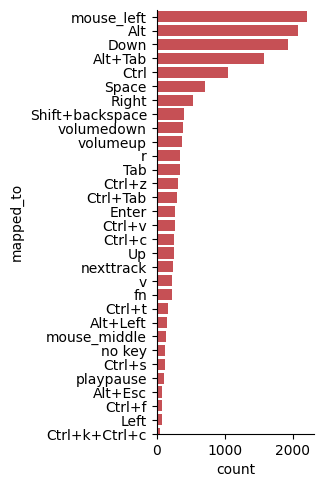

In [37]:
fig = plt.figure(figsize=(12,8))
df_tmp = df_key_interactions[df_key_interactions['event'] == 'down']
mapping_counts = df_tmp['mapped_to'].value_counts()
#type(mapping_counts)
sns.catplot(data=df_tmp, kind='count', y='mapped_to', order=mapping_counts.index, color='#da3c43', ) #hue='user_id')
plt.ylim(30)

In [ ]:
#fig = plt.figure(figsize=(20,8))
#df_tmp['uhrzeit'] = df_tmp['timestamp'].dt.hour
#df_tmp.dtypes
#df_tmp['uhrzeit']
#sns.histplot(data=df_tmp, x='uhrzeit', bins=60, color='#da3c43')